In [1]:
# loading the dataset

import pandas as pd

df = pd.read_csv("diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
# checking for missing values
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
# creating a copy of the dataset

df1 = df.copy()
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### Descriptive statistics

In [6]:
df1.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


- From the descriptive statistics we can see that the mininum values for Glucose,BloodPressure,SkinThickness,Insulin and BMI were zero. This caanot be true since the values cannot be zero.
- We shall treat the zeros as missing values.

In [7]:
import numpy as np
# convet the zeros to null values

df1[['Glucose','BloodPressure','SkinThickness','Insulin', 'BMI']] = df1[['Glucose','BloodPressure','SkinThickness','Insulin', 'BMI']].replace(0,np.NaN)

In [8]:
# checking for missing values

df1.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [9]:
df1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [10]:
df1.to_csv("df1.csv",index=False)

We can visualize the numerical features using histograms or boxplots.

In [11]:
df1.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

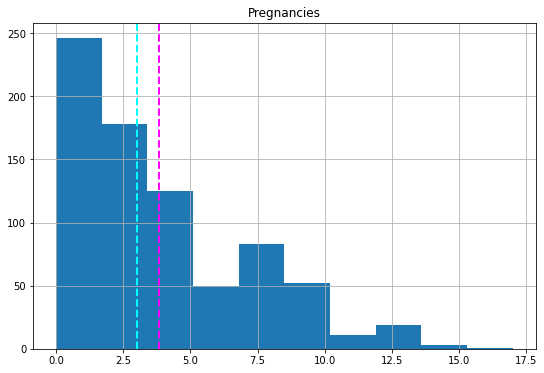

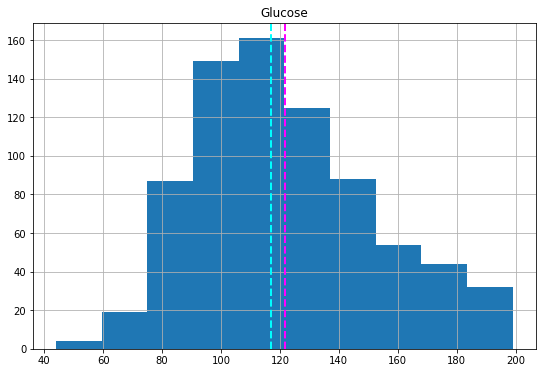

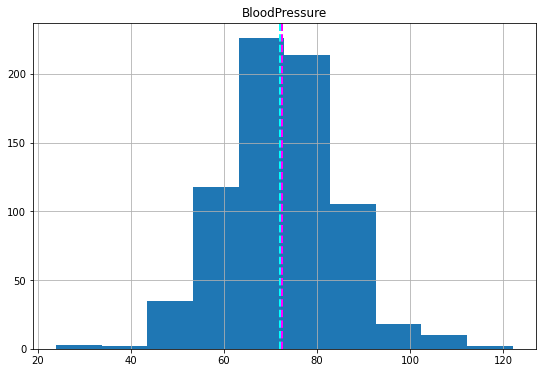

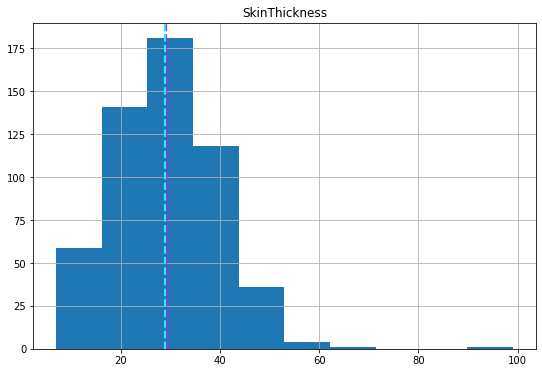

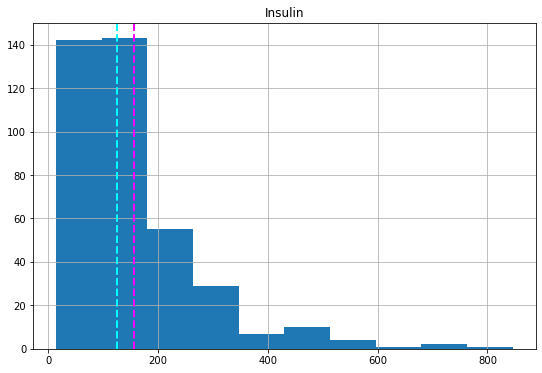

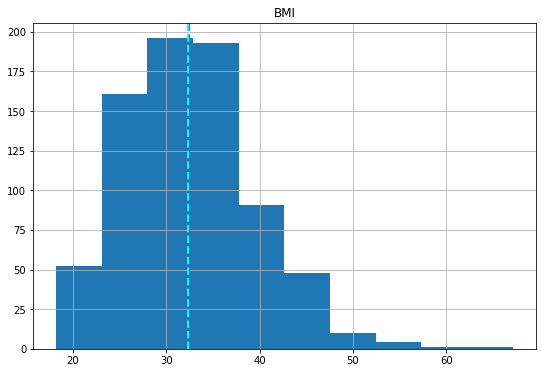

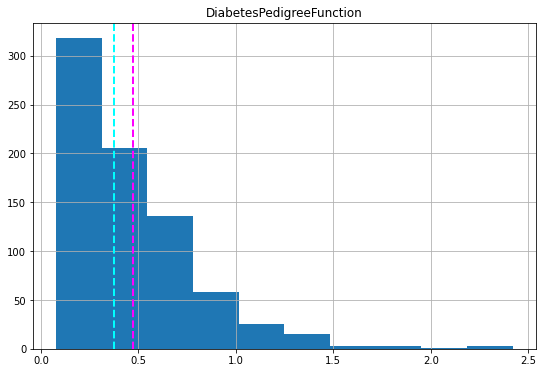

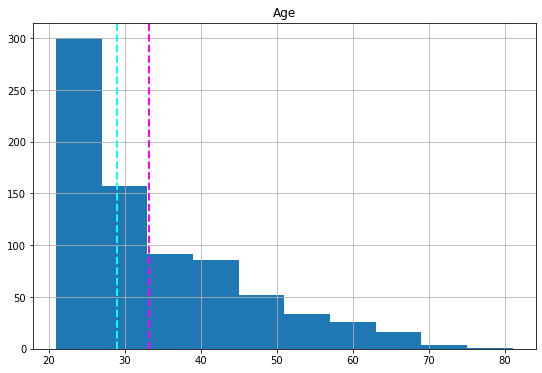

In [12]:
import matplotlib.pyplot as plt
# Creating an histogram for each numeric feature
numeric_features = df1.drop("Outcome",axis=1)

for col in numeric_features:
    fig = plt.figure(figsize=(9,6))
    ax = fig.gca()
    feature = df1[col]
    feature.hist(ax=ax)
    ax.axvline(feature.mean(),color = 'magenta',linestyle='dashed',linewidth=2)
    ax.axvline(feature.median(),color = 'cyan',linestyle='dashed',linewidth=2)
    ax.set_title(col)
plt.show()

- The mean and median of pregnancies,Insulin,DiabetesPedigreeFunction and Age are  closer to the low end of the range,this means that they have right-skewed distribution.
- Glucose,BloodPressure,Skin Thickness and BMI seem to be normally distributed,with the mean and median nearer the middle of the range of values.

### DATA PREPROCESSING

#### 1. IMPUTATION

In [ ]:
import pandas as pd
import numpy as np

df1 = pd.read_csv("df1.csv")
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,NaN,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,NaN,NaN,30.1,0.349,47,1


In [ ]:
df1.isna().sum()

In [ ]:
# Imputation

df1["Glucose"].fillna((df1["Glucose"].mean()),inplace=True)
df1["BloodPressure"].fillna((df1["BloodPressure"].mean()),inplace=True)
df1["SkinThickness"].fillna((df1["SkinThickness"].mean()),inplace=True)
df1["Insulin"].fillna((df1["Insulin"].median()),inplace=True)
df1["BMI"].fillna((df1["BMI"].mean()),inplace=True)

In [ ]:
# confirming the dataset does not have missing values
df1.isnull().sum()

In [ ]:
df1.head()

#### 2. Categorical encoding 

 

In [ ]:
df1["Outcome"].value_counts()

Our target varible(Outcome) is a binary category because it has two possibilities:
- 1(Diabetic)
- 0(Non Diabetic)
    

In [ ]:
df1.info()

In [ ]:
# converting the target variable to category

df1["Outcome"] = df1["Outcome"].astype("category").cat.as_ordered()

In [ ]:
df1.info()

#### 3. Checking for outliers

In [ ]:
# Plotting boxplots for the numerical features

for col in numeric_features:
    fig=plt.figure(figsize=(9,6))
    ax = fig.gca()
    df1.boxplot(col,ax=ax)
plt.show()

In [ ]:
df1.Insulin

In [ ]:
df1

#### 4. Numerical Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Get a scaler object
scaler = MinMaxScaler()
# Normalize numeric columns

df1[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]]=scaler.fit_transform(df1[["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]])


In [ ]:
df1.head()

#### 5. Feature selection

In [ ]:
cor = df1.corr()
cor

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.heatmap(cor,annot=True,cmap=plt.cm.Reds)
plt.show()

Since all the features(except SkinThickness and BMI) we can conclude that they probably predictive of the outcome.

In [ ]:
# Separate the features from labels
features=["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]
label=["Outcome"]

x,y = df1[features].values,df1[label].values

#### 6. Split the data into training and validation set

In [ ]:
from sklearn.model_selection import train_test_split

# split data 80%-20% into training and test set
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.15,random_state=0)
print('Training cases:%d\nTest cases:%d'%(x_train.shape[0],x_test.shape[0]))

In [ ]:
%%time
# Train the model
from sklearn.linear_model import LogisticRegression

# set regularization rate
reg=0.01
# Train a logistic regression model on the training set

model=LogisticRegression(C=1/reg,solver="liblinear").fit(x_train,y_train)
print(model)

In [ ]:
# We'll can test the training set using the data we held back to evaluate how well it predicts

predictions=model.predict(x_test)


#### 6. Checking for model accuracy

In [ ]:
# We may check the accuracy of the predictions(what proportion of the labels did the model predict correctly)

from sklearn.metrics import accuracy_score
print('Accuracy',accuracy_score(y_test,predictions))


This means the model got 82.75% of the predictions right.

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

In [ ]:
# We can retrive precision and recall values on their 
from sklearn.metrics import precision_score,recall_score

print("Overall Precision:",precision_score(y_test,predictions))
print("Overall Recall:",recall_score(y_test,predictions))

- **Precision**: Of all the predictions the model made for this class, what proportion were correct?

Of all the patients the model predicted are diabetic,78% are actually diabetic.

- **Recall**: Out of all of the instances of this class in the test dataset, how many did the model identify?

Of all the patients that are actual diabetic, the model identified 66%


These metrics are generally tabulated for the test data and shown together as a **confusion matrix**. The **True Negatives** and **True Positives** should be significantly higher than the *false predictions* for the model to be any good. 

In [ ]:
from sklearn.metrics import confusion_matrix
# print the confusion matrix
cm=confusion_matrix(y_test,predictions)
fig=sns.heatmap(pd.DataFrame(cm),annot=True,cmap=plt.cm.Blues)
plt.title("confusion_matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [ ]:
from sklearn.metrics import roc_auc_score

y_score=model.predict_proba(x_test)
auc = roc_auc_score(y_test,y_score[:,1])
print('AUC:'+ str(auc))

Area Under the Curve(AUC) quantifies the overall performance of the model.The closer to 1 this value is, the better the model.

#### Try a different algorithms

In [ ]:
%%time
from sklearn.neighbors import KNeighborsClassifier

model2 = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
print(model)

In [ ]:
predictions2=model2.predict(x_test)

print("Overall Precision:",precision_score(y_test,predictions))
print("Overall Recall:",recall_score(y_test, predictions))


In [ ]:
print("Overall Accuracy:",accuracy_score(y_test,predictions2))

In [ ]:
# print the confusion matrix
cm=confusion_matrix(y_test,predictions2)
fig=sns.heatmap(pd.DataFrame(cm),annot=True,cmap=plt.cm.Blues)
plt.title("confusion_matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [ ]:
y_score=model2.predict_proba(x_test)
auc = roc_auc_score(y_test,y_score[:,1])
print('AUC:'+ str(auc))

We can see that Logistic Regression Algorithm performed better than K-NeaghborsClassifier.
We'll now try **Ensemble Algorithm**(Random Forest Classifier)

In [ ]:
%%time
from sklearn.ensemble import RandomForestClassifier

model3=RandomForestClassifier(n_estimators=100).fit(x_train,y_train)

##### Checking for model accuracy

In [ ]:
# get the predictions

predictions3=model3.predict(x_test)
print("Accuracy:",accuracy_score(y_test,predictions))

In [ ]:
print("Overall Precision:",precision_score(y_test,predictions3))
print("Overall Recall:",recall_score(y_test, predictions3))


In [ ]:
cm=confusion_matrix(y_test,predictions3)
fig=sns.heatmap(pd.DataFrame(cm),annot=True,cmap=plt.cm.Blues)
plt.title("confusion_matrix")
plt.ylabel("Actual Label")
plt.xlabel("Predicted Label")

In [ ]:
y_score=model3.predict_proba(x_test)
auc = roc_auc_score(y_test,y_score[:,1])
print('AUC:'+ str(auc))

From the three different algorithms, the Logistic Regression Algorithm performed the best.

We will save the best model as a pickle file

In [ ]:
# save the best model
import joblib
filename='./diabetic_model.pkl'
joblib.dump(model,filename)